# 2D prescribed flow with bimodal aerosol population

Author: Jatan Buch (v1, 240401)

**NOTES**: 
- based on Figs. 8 & 9 from Arabas et al. 2015 (Geosci. Model Dev.) https://doi.org/10.5194/gmd-8-1677-2015

In [1]:
# PySDM libraries
from PySDM_examples.Szumowski_et_al_1998 import Storage
from PySDM import Formulae
from PySDM.physics import si
from PySDM.initialisation.spectra import Lognormal

from open_atmos_jupyter_utils import TemporaryFile
from PySDM_examples.utils import DummyController
from PySDM.exporters import NetCDFExporter

# mod case files
from case_files.settings_2d import Settings
from case_files.spin_up_2d import SpinUp
from case_files.simulation_2d import Simulation

import numpy as np
import xarray
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from utils.plot_params_mpl39 import params
import matplotlib.pylab as pylab
import seaborn as sns
pylab.rcParams.update(params)
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline
%config IPython.matplotlib.backend = 'retina'
%config InlineBackend.figure_format = 'retina'

sav_file_path= "../../sav_files/run_2D_output_files/"

/Users/hyfives-lamont/Desktop/cloud_seeding/PySDM/PySDM/backends/impl_numba/conf.py:19: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


## Case setup

In [2]:
settings = Settings(
    Formulae(),
    n_sd_per_mode= (32, 32),
    aerosol_modes_by_kappa= {
            .54: Lognormal(
                        norm_factor= 50 / si.cm ** 3,
                        m_mode= 1E2 * si.nm,
                        s_geom=1.4
                ),
            .85: Lognormal(
                    norm_factor= 50/ si.cm ** 3,
                    m_mode= 1E3 * si.nm,
                    s_geom= 1.2
                )
            },
    z_part= ((0., 1), (0., 0.25)),
    x_part= ((0., 1), (0., 0.25)),
    )

#settings.n_sd_per_gridbox = 25
settings.grid = (25, 25) # x-z grid
settings.size= (1500 * si.metres, 1500 * si.metres)
settings.simulation_time = 5400 * si.second

storage = Storage()
simulation = Simulation(settings, storage, SpinUp)
simulation.reinit()
simulation.run()

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


0.0% (times since last print: cpu=12.2s wall=12.4s)
1.1% (times since last print: cpu=42.2s wall=42.7s)
2.2% (times since last print: cpu=1.0s wall=1.1s)
3.3% (times since last print: cpu=1.1s wall=1.1s)
4.4% (times since last print: cpu=1.1s wall=1.1s)
5.6% (times since last print: cpu=1.1s wall=1.1s)
6.7% (times since last print: cpu=1.2s wall=1.2s)
7.8% (times since last print: cpu=1.3s wall=1.3s)
8.9% (times since last print: cpu=1.4s wall=1.4s)
10.0% (times since last print: cpu=1.5s wall=1.6s)
11.1% (times since last print: cpu=1.8s wall=1.8s)
12.2% (times since last print: cpu=2.0s wall=2.0s)
13.3% (times since last print: cpu=2.1s wall=2.1s)
14.4% (times since last print: cpu=2.2s wall=2.2s)
15.6% (times since last print: cpu=2.2s wall=2.3s)
16.7% (times since last print: cpu=2.3s wall=2.3s)
17.8% (times since last print: cpu=2.2s wall=2.3s)
18.9% (times since last print: cpu=2.2s wall=2.2s)
20.0% (times since last print: cpu=2.1s wall=2.2s)
21.1% (times since last print: cpu=2

In [7]:
exporter = NetCDFExporter(storage, settings, simulation, sav_file_path + "seeded_benchmark_x_z_sample.nc")
exporter.run(controller=DummyController())

0.0% (times since last print: cpu=0.0s wall=0.0s)
1.1% (times since last print: cpu=0.0s wall=0.0s)
2.2% (times since last print: cpu=0.0s wall=0.0s)
3.3% (times since last print: cpu=0.0s wall=0.0s)
4.4% (times since last print: cpu=0.0s wall=0.0s)
5.5% (times since last print: cpu=0.0s wall=0.0s)
6.6% (times since last print: cpu=0.0s wall=0.0s)
7.7% (times since last print: cpu=0.0s wall=0.0s)
8.8% (times since last print: cpu=0.0s wall=0.0s)
9.9% (times since last print: cpu=0.0s wall=0.0s)
11.0% (times since last print: cpu=0.0s wall=0.0s)
12.1% (times since last print: cpu=0.0s wall=0.0s)
13.2% (times since last print: cpu=0.0s wall=0.0s)
14.3% (times since last print: cpu=0.0s wall=0.0s)
15.4% (times since last print: cpu=0.0s wall=0.0s)
16.5% (times since last print: cpu=0.0s wall=0.0s)
17.6% (times since last print: cpu=0.0s wall=0.0s)
18.7% (times since last print: cpu=0.0s wall=0.0s)
19.8% (times since last print: cpu=0.0s wall=0.0s)
20.9% (times since last print: cpu=0.0s w

In [16]:
output= xarray.open_dataset(sav_file_path + "benchmark_case.nc")

In [17]:
output= output.transpose("T", "Z", "X", "Particles Wet Size Spectrum_bin_left_edges", "Particles Dry Size Spectrum_bin_left_edges", 'radius binned number averaged terminal velocity_bin_left_edges')

In [13]:
list(range(70, 89, 1))

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]

/var/folders/s1/9vttm2bd2074z9_lf1r86fkm0000gn/T/ipykernel_15171/3298348711.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(8, 6))


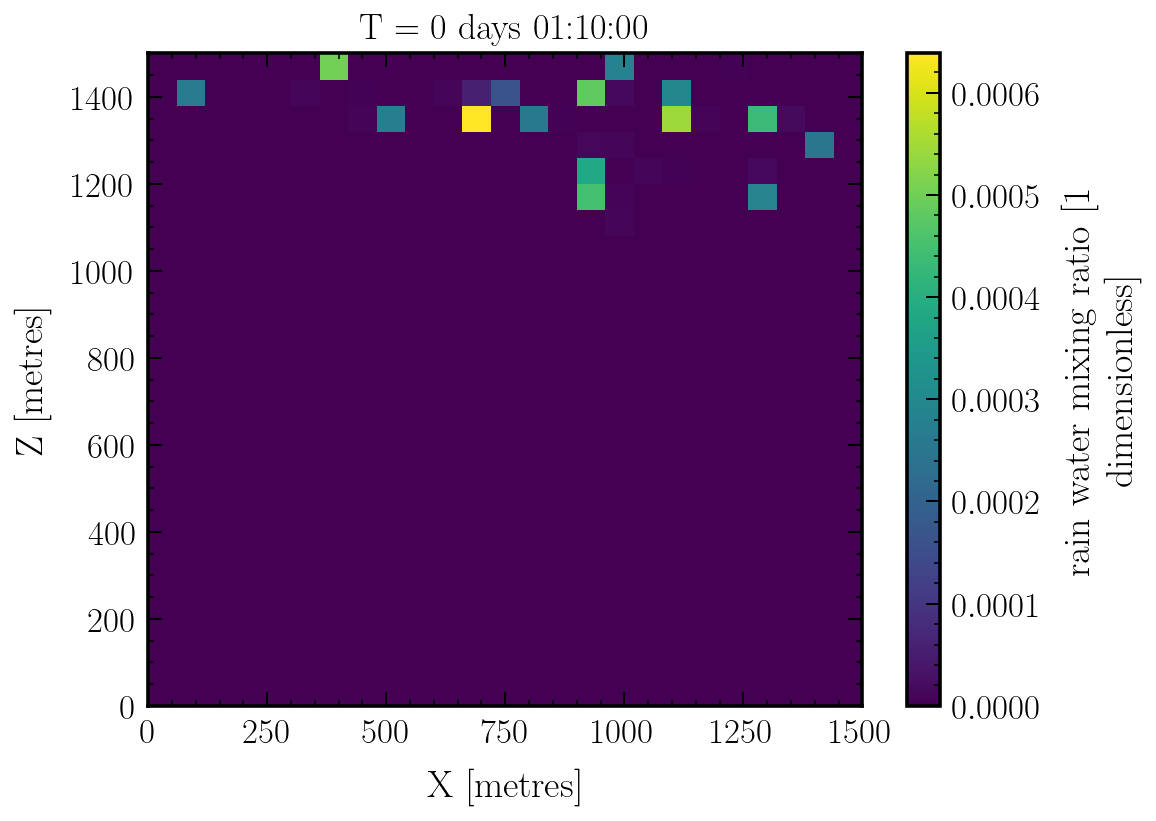

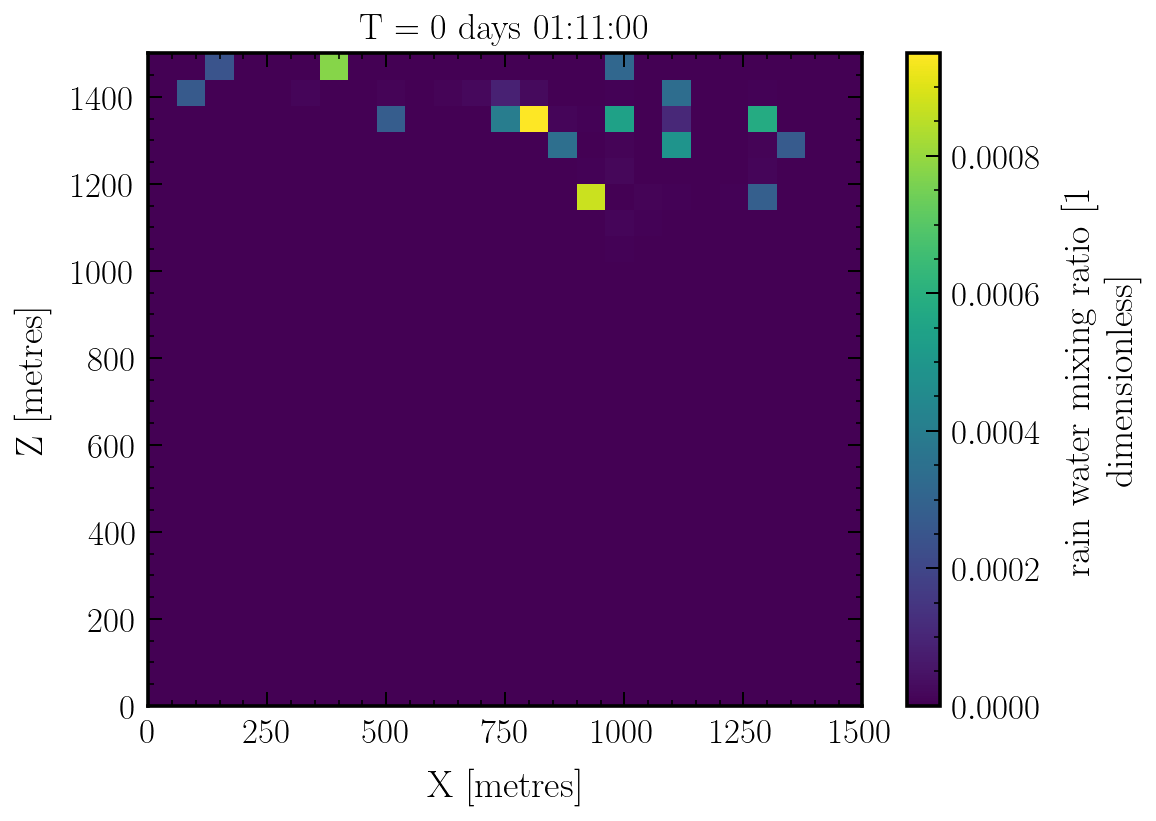

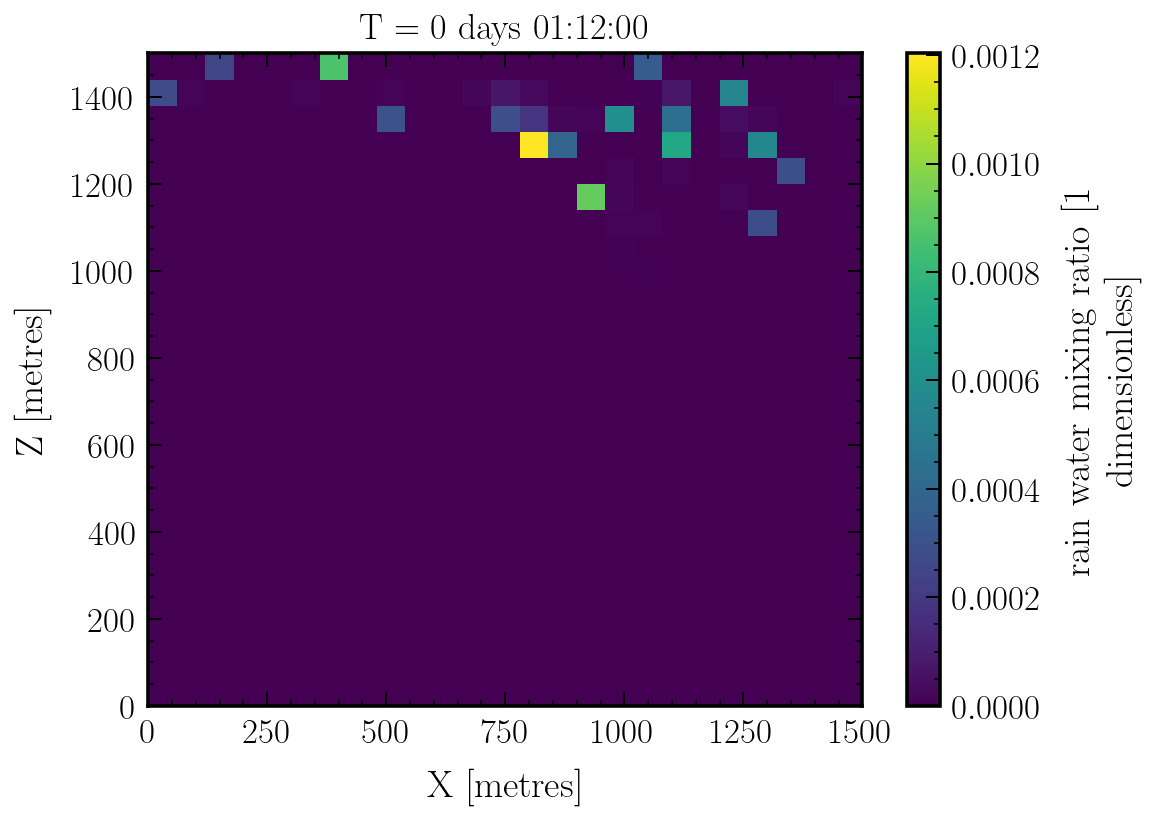

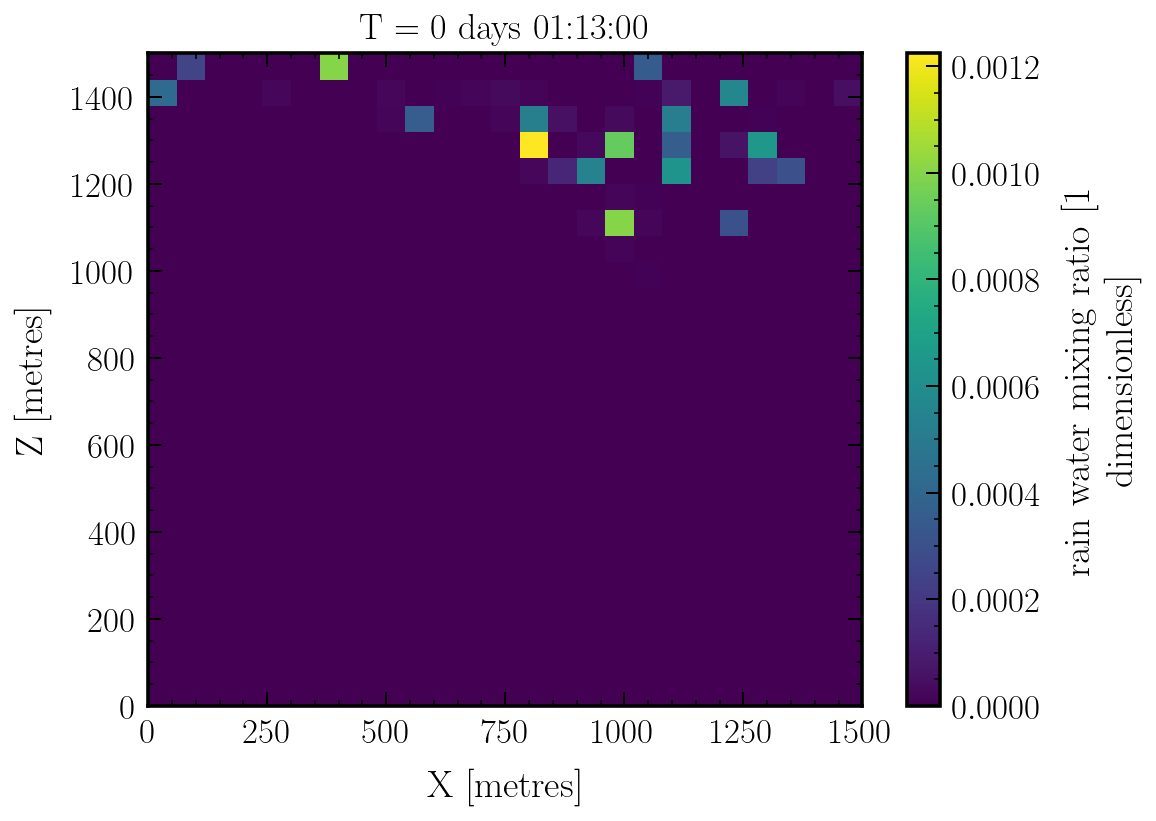

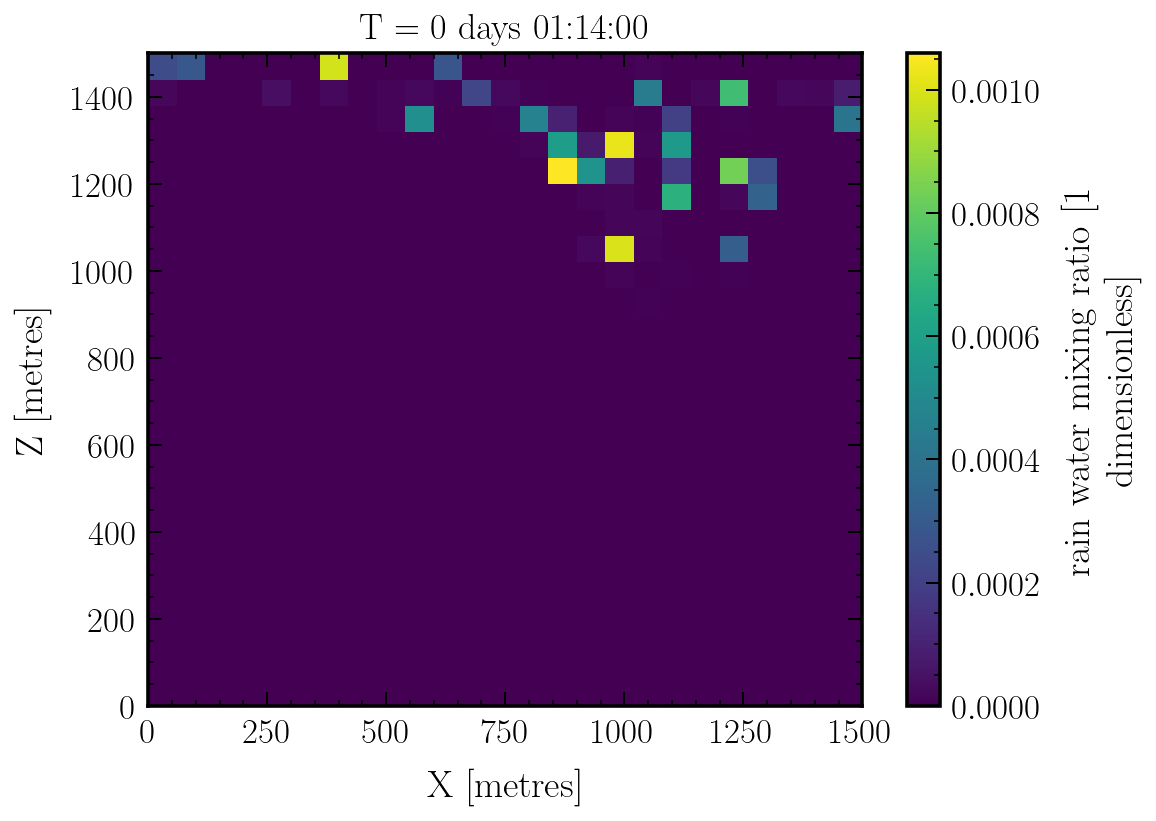

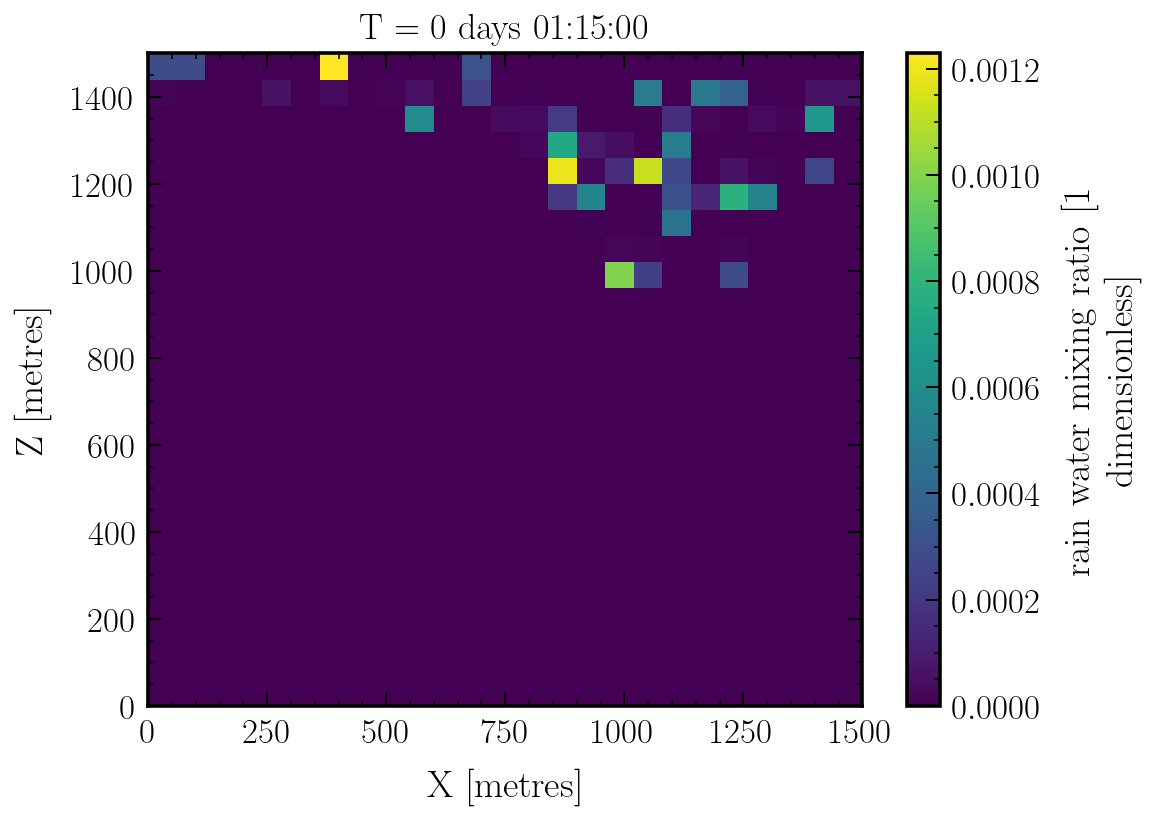

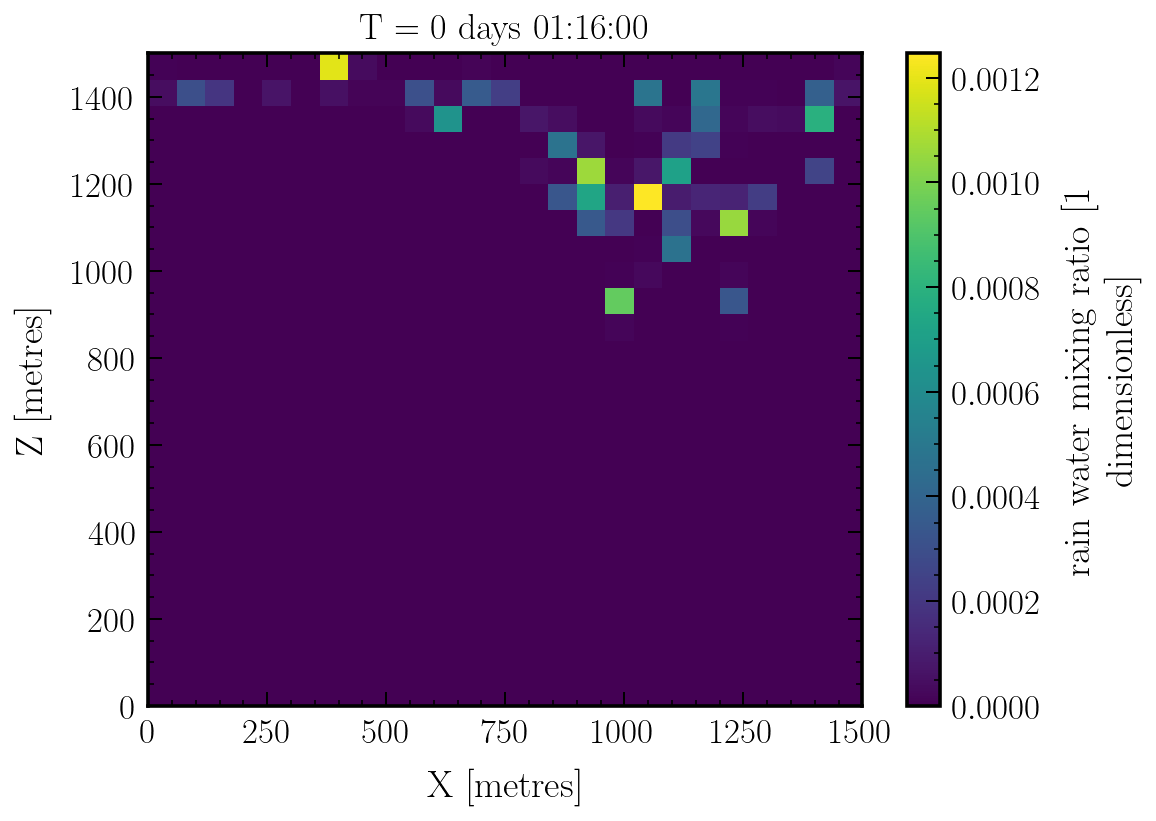

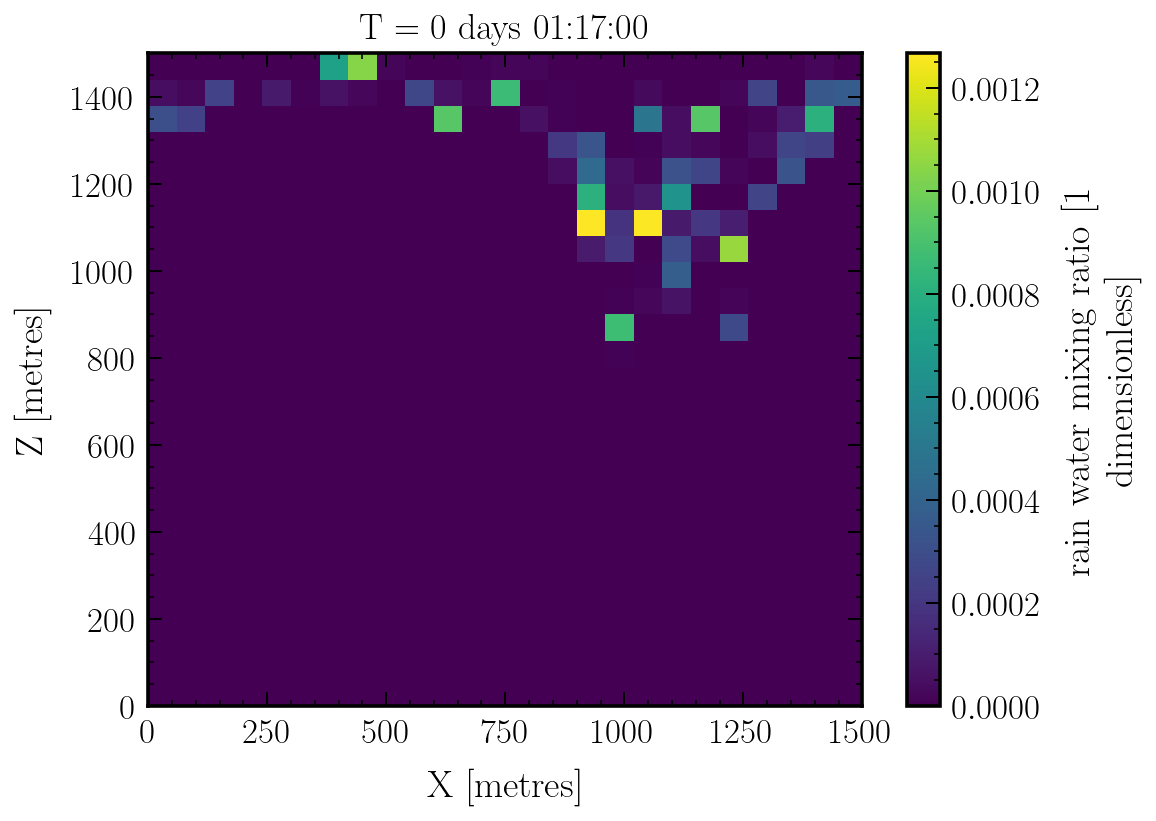

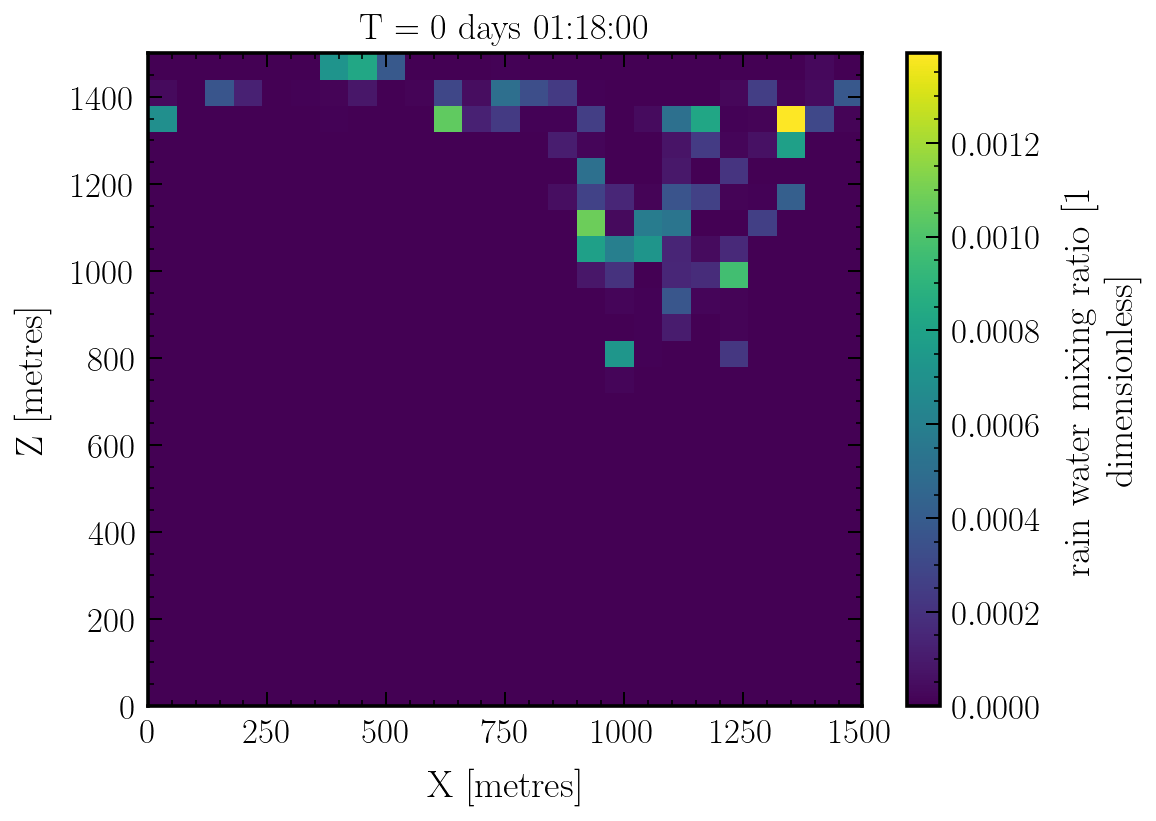

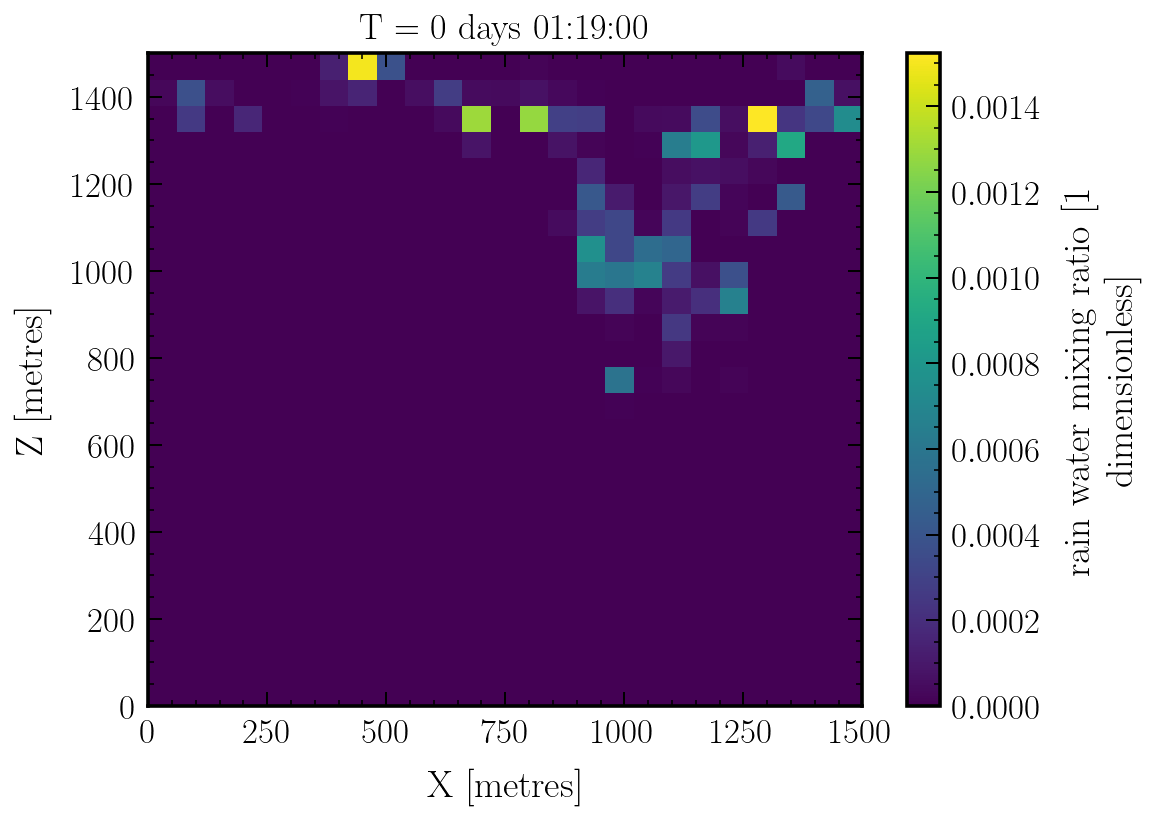

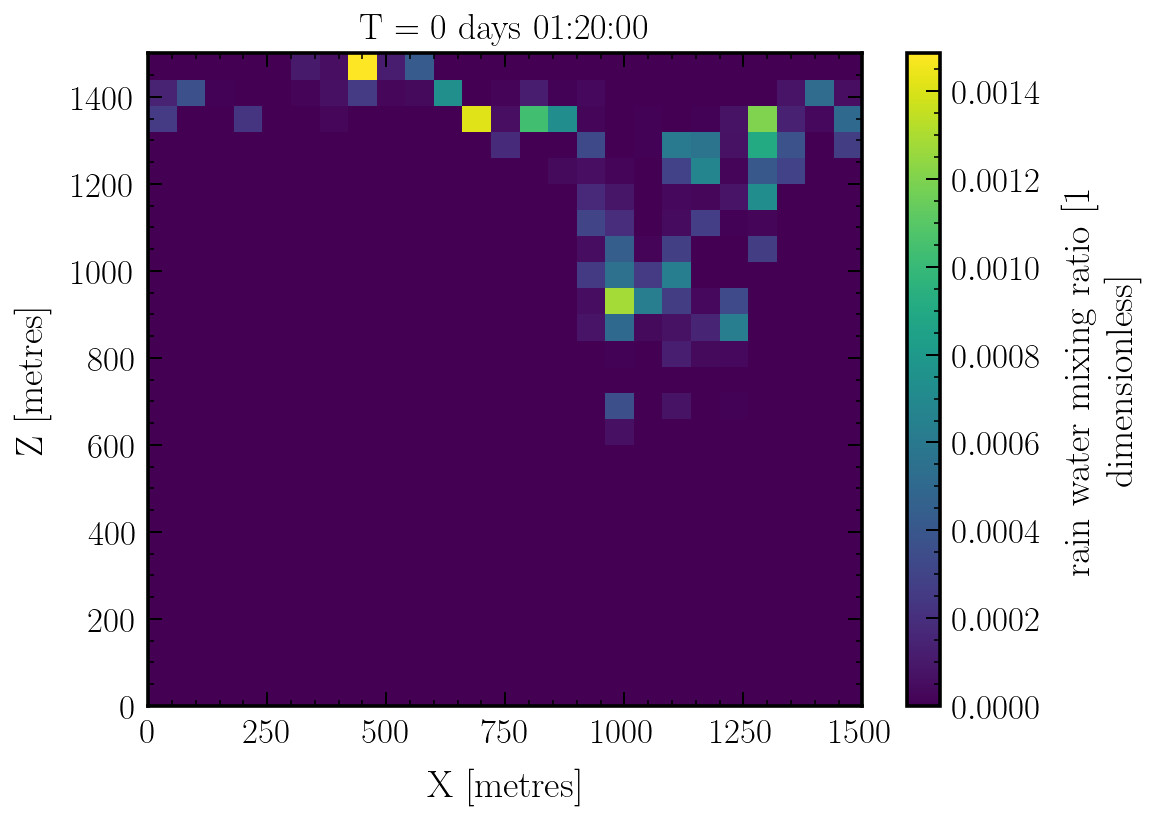

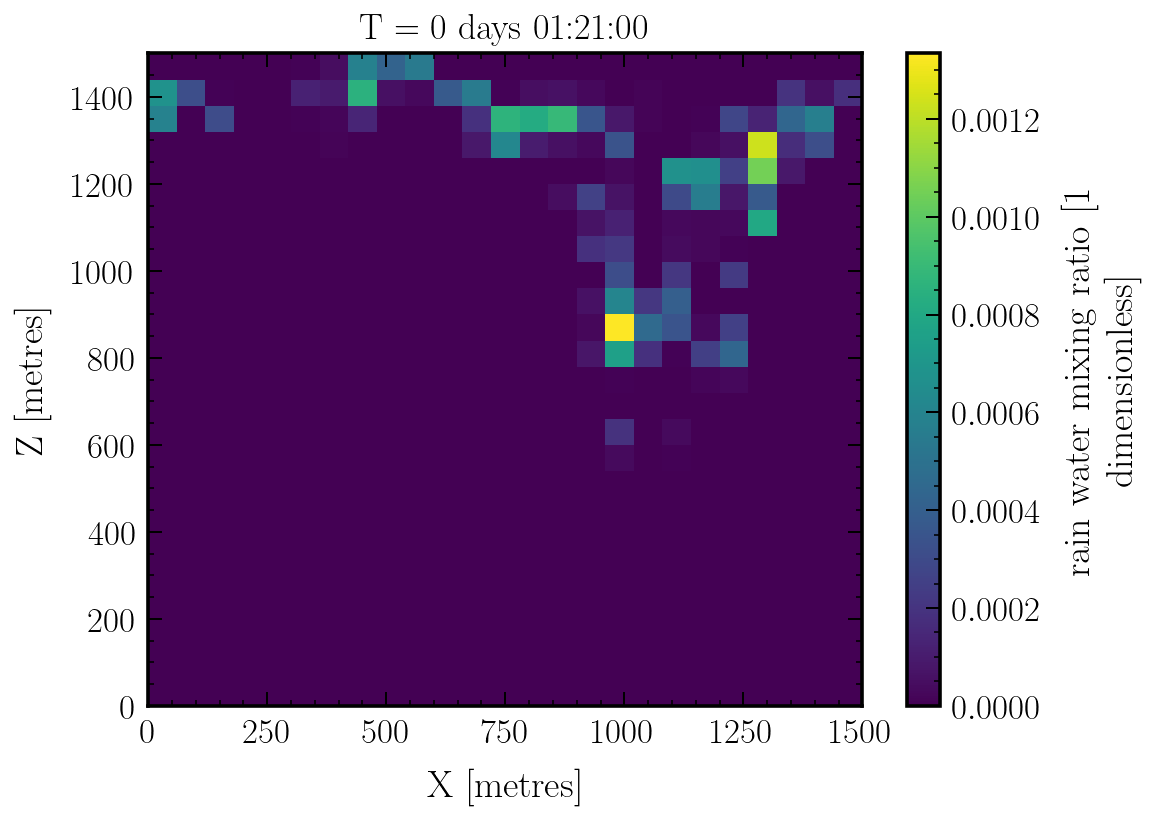

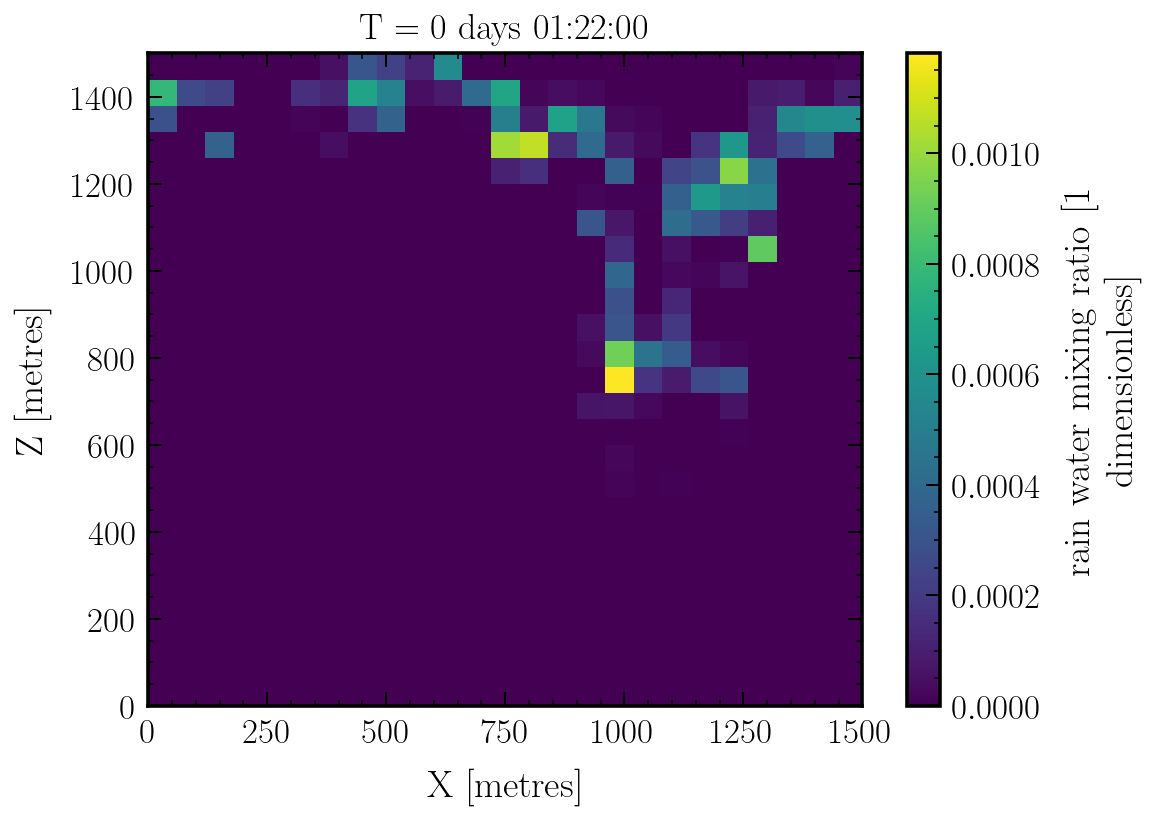

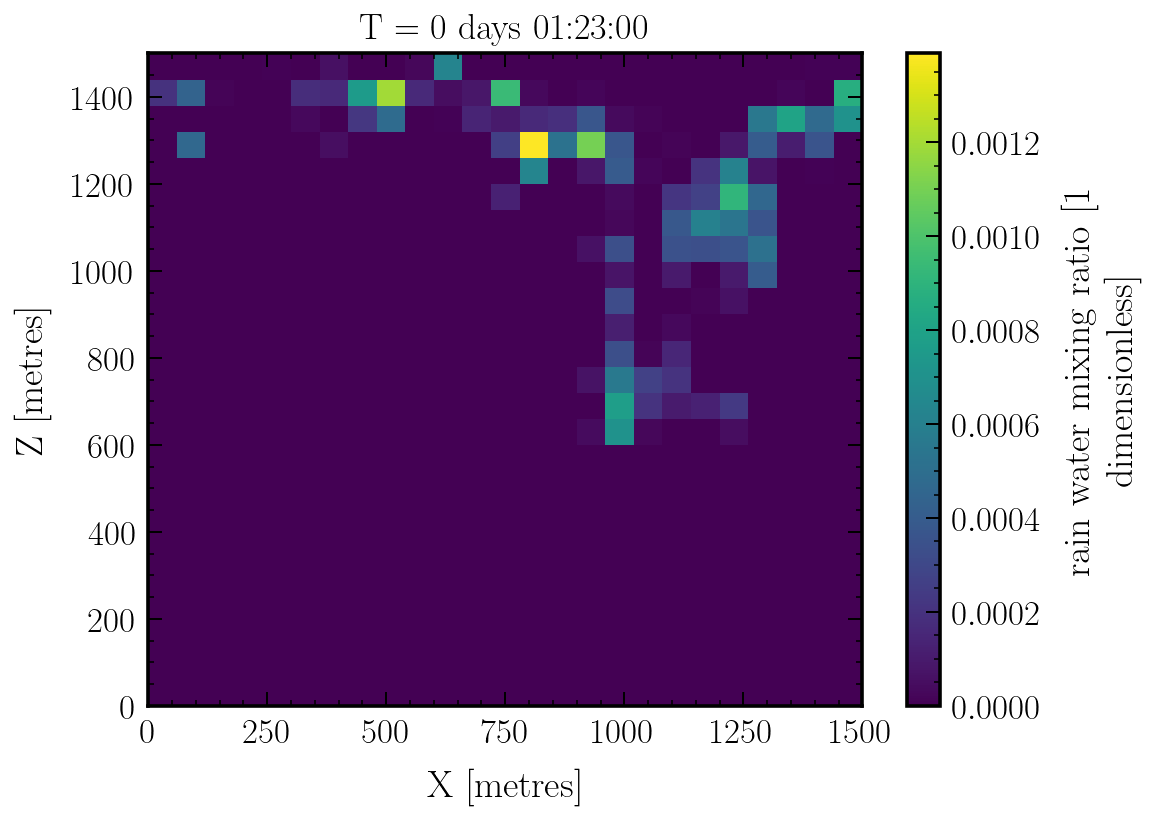

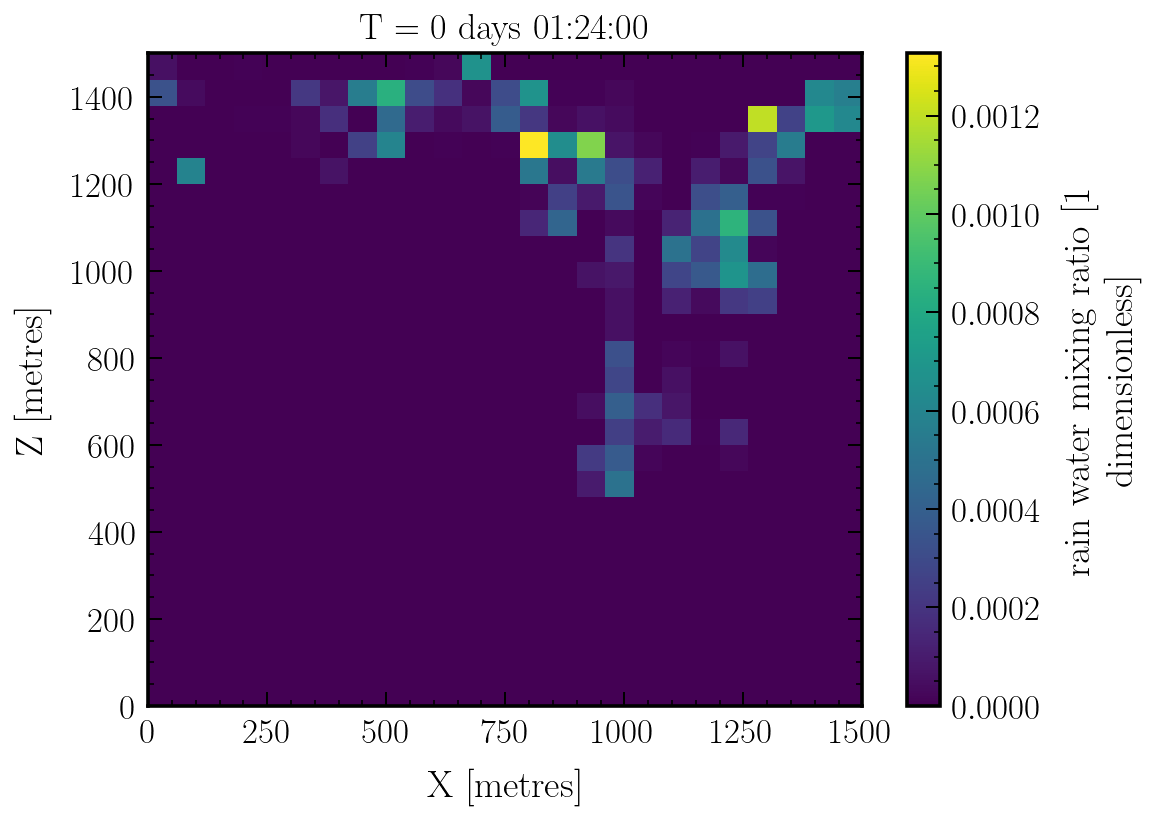

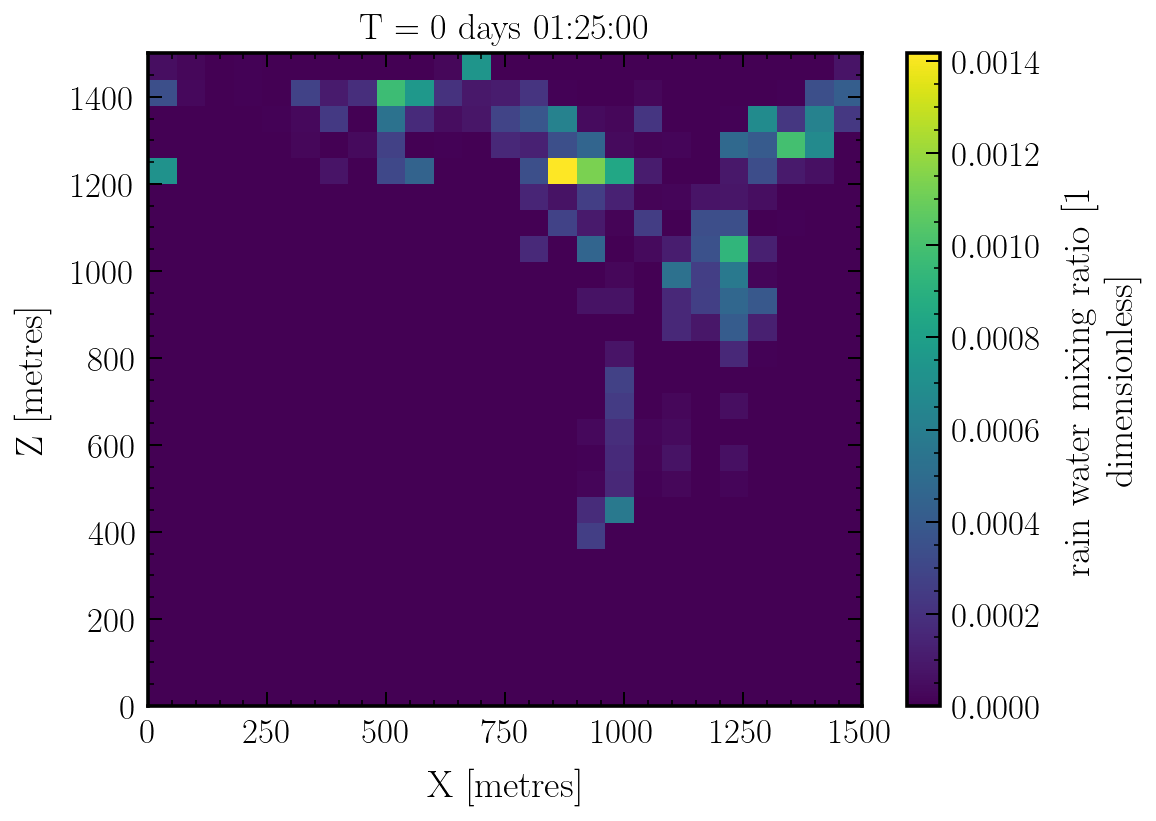

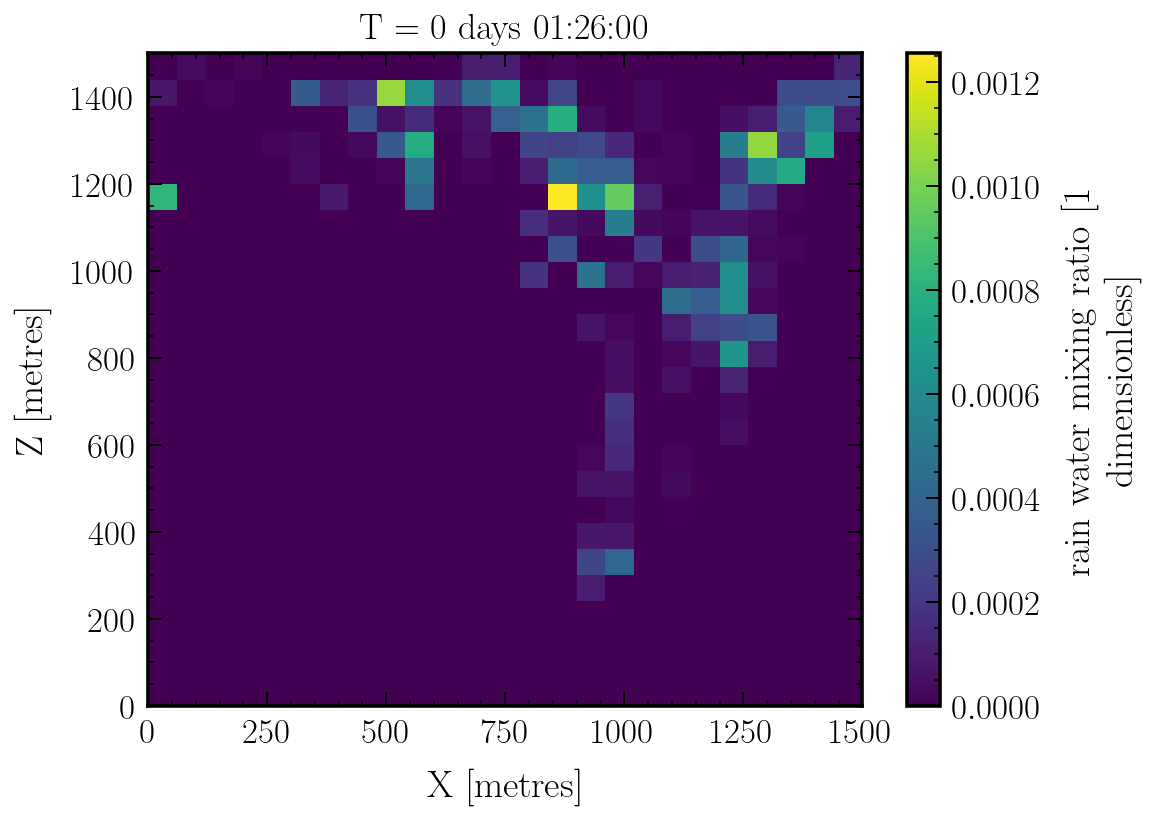

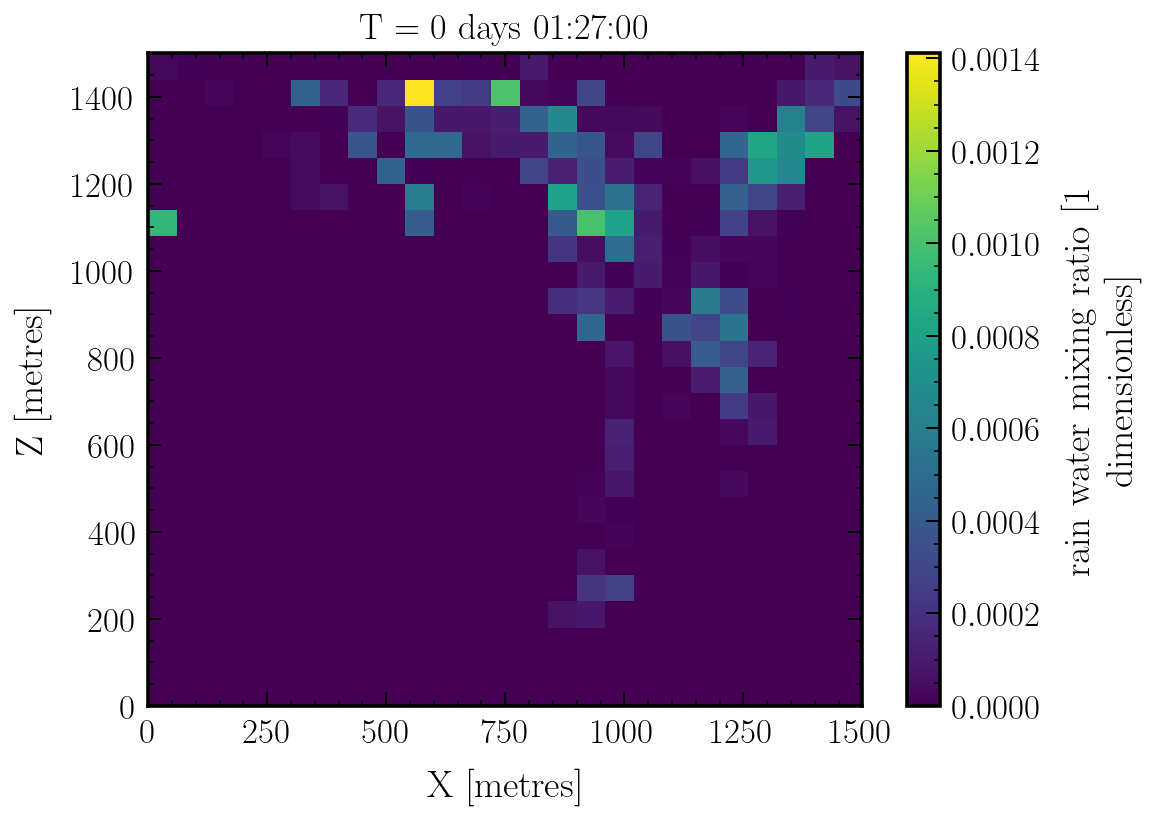

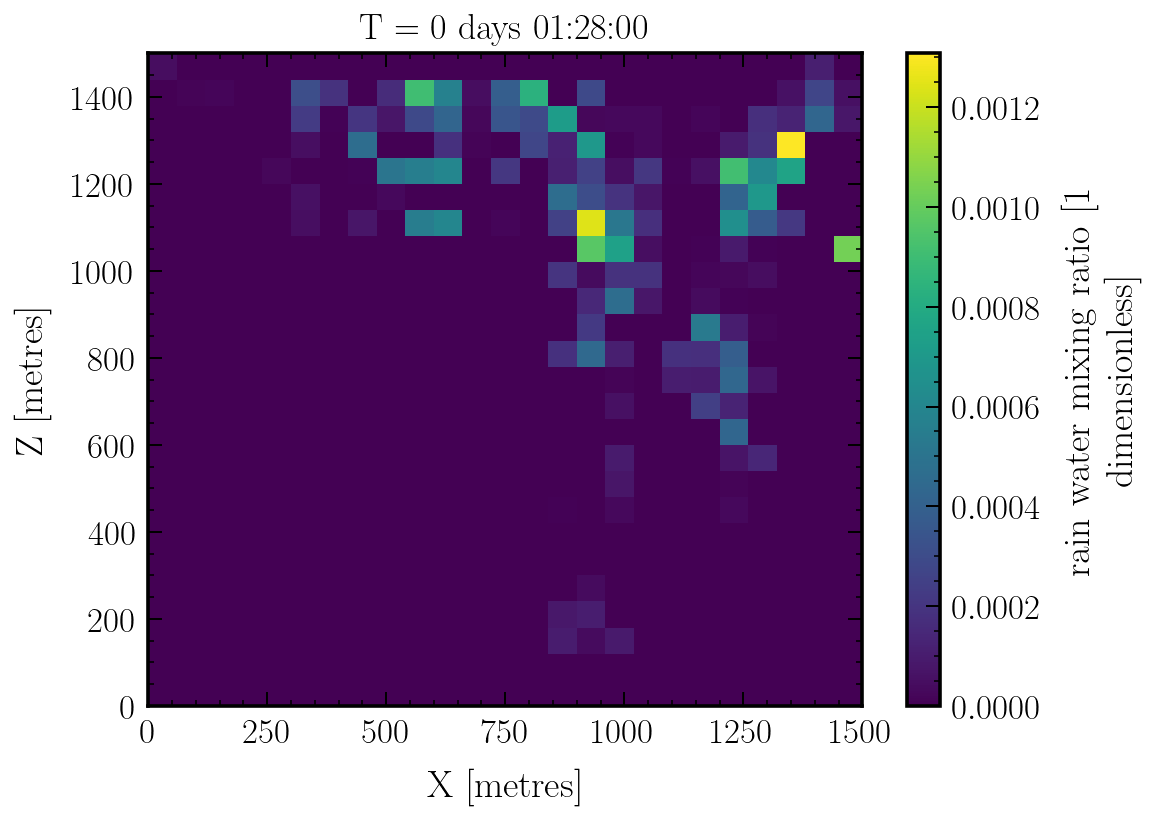

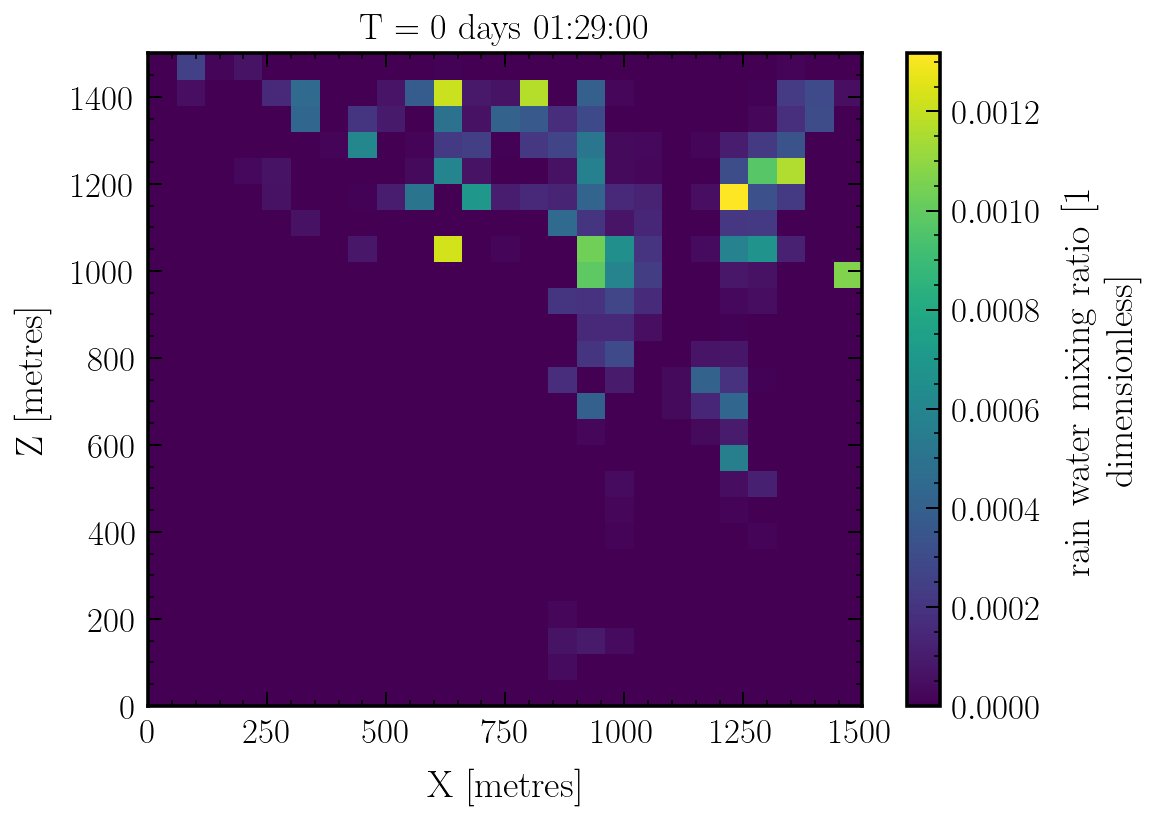

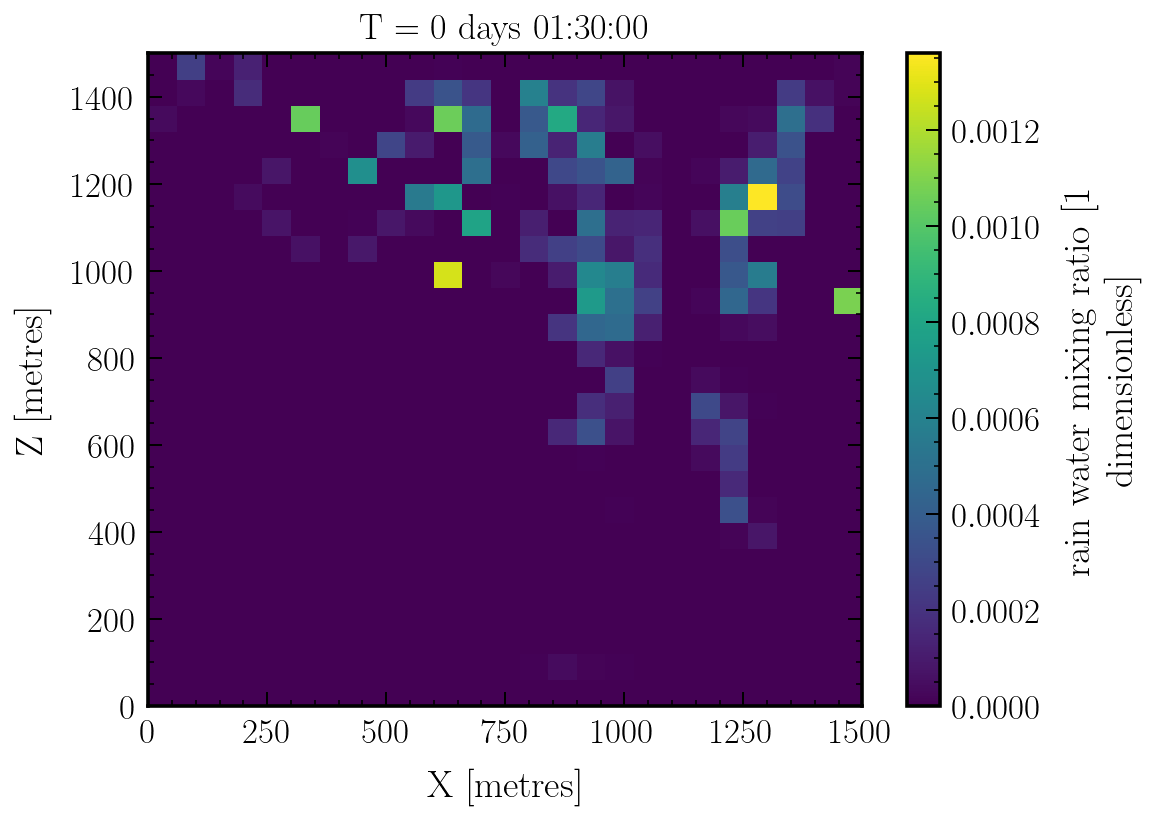

In [18]:
for i in range(70, 91, 1):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    output['rain water mixing ratio'][i].plot(ax= ax)
    plt.savefig("./output_%d.jpg"%i, dpi= 300, bbox_inches= "tight");

In [19]:
from PIL import Image

# List of image file paths
image_files = ["./output_%d.jpg"%i for i in range(70, 91, 1)]

# Open the images and store them in a list
images = [Image.open(img_file) for img_file in image_files]

# Create a GIF from the images
output_gif_path = "../../plots/rain_2D_no_seed_gif.gif"
images[0].save(
    output_gif_path, 
    save_all=True, 
    append_images=images[1:],  # Appends all images in the list after the first one
    optimize=False, 
    duration=500,  # Duration each image shows in the GIF in milliseconds
    loop=0  # Loop forever
)

print(f"GIF saved at {output_gif_path}")

GIF saved at ../../plots/rain_2D_no_seed_gif.gif


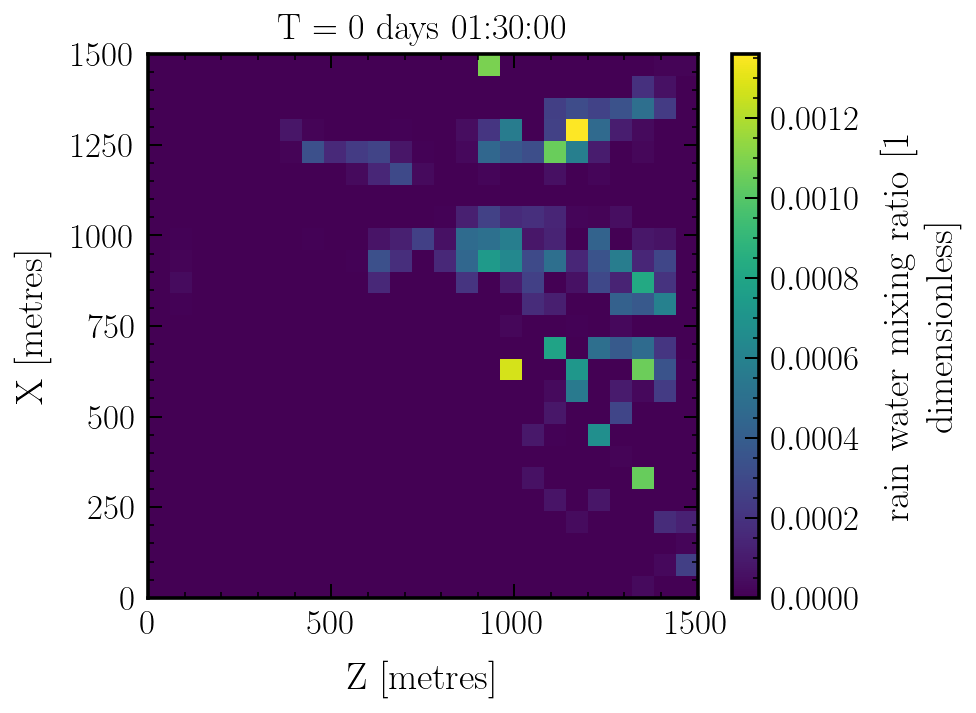

In [8]:
output['rain water mixing ratio'][90].plot()

## Experiments

In [3]:
from utils import spatial_sampling_2d as spatial_sampling
from PySDM.impl.mesh import Mesh
from PySDM.backends import CPU
from copy import deepcopy

In [4]:
mesh= Mesh(settings.grid, settings.size)

In [11]:
positions = spatial_sampling.Pseudorandom().sample(backend= CPU(), grid= settings.grid, n_sd= 32*25*25)

In [13]:
cellid, cellog, poscell= mesh.cellular_attributes(positions)

In [17]:
cellog_b= deepcopy(cellog)

In [24]:
np.append(cellog, cellog_b, axis= 1).shape

(2, 40000)